<a href="https://colab.research.google.com/github/andrebelem/pythonverse/blob/main/Comparativo_Tmax_Uruguaiana_CESM_ERA_INMET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# E assim fazemos ciência !
### Um exemplo voltado para a comparação da Temperatura Máxima do Ar (2m) em Uruguaiana, RS
#### Plataforma Preferencial: Jupyter Notebook/Jupyter Lab/COLAB.
<br>

Criado por [Andre L. Belém](mailto:andrebelem@id.uff.br) e [Willy Hagi](mailto:meteonorte@meteonorte.com)

Histórico:<br>

Em pleno carnaval de 2022, Willy postou no [Linkedin](https://www.linkedin.com/posts/willyhagi_meteorologia-activity-6904444520315138048-9V2P) o record de temperatura  na cidade de Uruguaiana, RS, 42.9 °C 🔥 !! registrado no Domingo dia 28/02. Segundo as notícias, essa foi a temperatura recorde desde o início da medição do Instituto Nacional de Meteorologia (Inmet), em 1931. Algumas fontes disseram que, além de ser a maior temperatura do município, também é a maior da história do Rio Grande do Sul.<br>
E no meio da conversa veio aquela máxima: "e olhando no passado mais distante ?". Bem, é claro que observações instrumentais são bem diferentes do que "sobra" para estudarmos estes eventos no passado - __reanalises de modelos__. Mas ainda assim é possível fazer algumas comparações.

### CESM-LME

O modelo que escolhemos aqui foi o [CESM](https://www.cesm.ucar.edu/models/) (Community Earth System Model) do [NCAR](https://ncar.ucar.edu/) (National Center for Atmospheric Research), que possui um projeto com uma série de experimentos comunitários do Last Millennium, conhecido como Last Millennium Ensemble ([LME](https://www.cesm.ucar.edu/projects/community-projects/LME)). O LME é baseado em uma grade na atmosfera e terra com ~2° de resolução espacial, e ~1° sobre o oceano, e conta ainda com uma versão de gelo marinho do CESM-CAM5_CN (grade 1.9x2.5_gx1v6). Os membros do conjunto de simulações se estendem de 850 (isso mesmo, 850 AD!) a 2006 usando reconstruções para a evolução transitória da intensidade solar, emissões vulcânicas, gases de efeito estufa, aerossóis, condições de uso da terra e parâmetros orbitais, juntos e individualmente. O que usamos aqui são os resultados de 13 simulações com todas as forçantes transitórias, entre 1850 e 2006, com saídas de 6 horas (diárias, 4x)e distribuidas pelo [Earth System Grid](http://www.earthsystemgrid.org) como uma única série temporal variável. Se você quiser repetir isso, entre no ESG no link acima e baixe os dados que quiser (você irá precisar se registrar). A variável que usamos foi a TREFHT, que corresponde no CESM à temperatura do ar de 2 m, baseada em uma extrapolação para o nível mais baixo do modelo CAM para 2 m com base em alguma aproximação de estabilidade.<br>
No programa abaixo, já fornecemos o link para os campos do CESM-LME em Netcdf (originalmente distribuidos pelo ESG).

### ERA5

Aqui a coisa ficou mais complicada. O [ERA5](https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-single-levels) é a reanálise do [ECMWF](https://www.ecmwf.int/) de quinta geração para o clima global e o clima das últimas décadas. Atualmente, os dados estão disponíveis a partir de 1950, divididos em entradas do Climate Data Store (link acima) para 1950-1978 (extensão preliminar de reanalise) e de 1979 em diante (lançamento final). Por uma restrição do próprio CDS, só foi possível baixar um conjunto de dados entre 1959-presente, para os horários 0, 6, 12, 18 horas para cada dia, e em um quadrado definido por Norte -29,71°, Oeste -57,14°, Sul -29,81°, Leste -57,01°, que corresponde à cidade de [Uruguaiana, RS](https://www.google.com/maps/place/Uruguaiana,+RS/@-29.7716722,-57.1109429,13z). Essa operação durou 5 horas e 42 minutos (! isso mesmo ! tudo isso para baixar apenas 1.2 MB do CDS!). Mas funcionou e o arquivo também é disponibilizado abaixo.

### INMET

Na reportagem, o Instituto Nacional de Meteorologia (Inmet), alega que o início da medição em 1931 é o marco histórico para a meteorologia em Uruguaiana, mas a história é outra. Via pacote [hydrobr](https://wallissoncarvalho.github.io/HydroBr/), construido pelo [Wallison Carvalho](https://github.com/wallissoncarvalho), e que permite fazer o download de dados do INMET, só existe a estação automática [A809](https://tempo.inmet.gov.br/GraficosDiarios/A809). A outra estação em Uruguaiana e que é convencional é a 83928, do Aeroporto de Uruguaiana e controlada pelo [DECEA](https://www.decea.mil.br/). O acesso aos dados históricos só pode ser feito pelo [BMDEP](https://bdmep.inmet.gov.br/) em um processo moroso, complexo e que é limitado à 6 meses de observação (!). Ou seja, não é "bem assim" que o marco histórico é de 1931. Então, trabalhamos com os dados da estação automática A809 mesmo.<br>

**Agora vamos para o programa** (pegue uma xícara de café pois algumas operações são demoradas).


In [ ]:
# primeiro, uma atualização necessária para trabalhar com arquivos grandes
# para os neuróticos, só comentar o %%capture
%%capture
!pip install --upgrade --no-cache-dir gdown

In [ ]:
# Baixando os arquivos necessários do gdrive. Os arquivos do CESM são grandes.
# o tempo médio para download é de 2 minutos.
# note que essa versão do gdown não precisa fornecer o --id
!gdown 1dY4BZmehPSB5h6Y8v7WPNeoKHdMRGvHf
!gdown 1-0f1zwSNG7ObxyHmeGK5vHedkRv0jhRH
!gdown 1-DpD5DfvhPl4Zy0EjDSEew4FxPgRno5c
!gdown 189RRZ609A_Yxkx8rnGHFoA1ubEUjwQrC

Downloading...
From: https://drive.google.com/uc?id=1dY4BZmehPSB5h6Y8v7WPNeoKHdMRGvHf
To: /content/b.e11.BLMTRC5CN.f19_g16.007.cam.h2.TREFHT.1850010100Z-1899123118Z.nc
100% 3.26G/3.26G [00:48<00:00, 67.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-0f1zwSNG7ObxyHmeGK5vHedkRv0jhRH
To: /content/b.e11.BLMTRC5CN.f19_g16.007.cam.h2.TREFHT.1900010100Z-1949123118Z.nc
100% 3.26G/3.26G [00:39<00:00, 83.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-DpD5DfvhPl4Zy0EjDSEew4FxPgRno5c
To: /content/b.e11.BLMTRC5CN.f19_g16.007.cam.h2.TREFHT.1950010100Z-2005123118Z.nc
100% 3.65G/3.65G [01:05<00:00, 56.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=189RRZ609A_Yxkx8rnGHFoA1ubEUjwQrC
To: /content/ERA5-Tair2m-Uruguaiana.nc
100% 1.16M/1.16M [00:00<00:00, 7.78MB/s]


In [ ]:
#agora vamos primeiro juntar todos os dados do CESM em um único dataframe
# note que você está trabalhando com arquivos "grandes"... isso leva algum tempo (~5 minutos)
import xarray as xr
import pandas as pd
files = ['b.e11.BLMTRC5CN.f19_g16.007.cam.h2.TREFHT.1850010100Z-1899123118Z.nc',
         'b.e11.BLMTRC5CN.f19_g16.007.cam.h2.TREFHT.1900010100Z-1949123118Z.nc',
         'b.e11.BLMTRC5CN.f19_g16.007.cam.h2.TREFHT.1950010100Z-2005123118Z.nc']

# posição de Uruguaiana
uruguaiana = [-29.7495, -57.0882+360] # para o CESM, longitude é 0-360

# neste laço, abrimos cada campo (netcdf) e extraimos o valor de TREFHT 
# para o ponto via interpolação linear
ic = 0
for file in files:
    print(f'fazendo arquivo {file}...')
    dset = xr.open_dataset(file)
    ds = dset.interp(lon=uruguaiana[1],lat=uruguaiana[0],method='linear').TREFHT
    mymax = ds.groupby('time.year').max()-273.15
    df = mymax.to_dataframe()
    if ic==0:
        df_cesm = df
    else:
        df_cesm = pd.concat([df_cesm,df],axis=0)
    ic = ic+1

# ao final, você tem um único dataframe
df_cesm = df_cesm[['TREFHT']]
df_cesm.columns=['Tmax']

fazendo arquivo b.e11.BLMTRC5CN.f19_g16.007.cam.h2.TREFHT.1850010100Z-1899123118Z.nc...
fazendo arquivo b.e11.BLMTRC5CN.f19_g16.007.cam.h2.TREFHT.1900010100Z-1949123118Z.nc...
fazendo arquivo b.e11.BLMTRC5CN.f19_g16.007.cam.h2.TREFHT.1950010100Z-2005123118Z.nc...


In [ ]:
## agora Vamos aos dados do ERA5
import xarray as xr

dset_era = xr.open_dataset('ERA5-Tair2m-Uruguaiana.nc')
# lembrando que no ERA, a longitude é -180+180
ds = dset_era.interp(longitude=uruguaiana[1]-360,latitude=uruguaiana[0],method='linear').t2m
df_era5 = (ds.groupby('time.year').max()-273.15)
df_era5 = df_era5.to_dataframe()
df_era5 = df_era5[['t2m']]
df_era5.columns = ['Tmax']


In [ ]:
# Aqui baixamos os dados da estação automática do INMET usando o hydrobr
%%capture
!pip install hydrobr

In [ ]:
import hydrobr

# se você não confia, e quer verificar se é isso mesmo, descomente o código abaixo
#lista = hydrobr.get_data.INMET.list_stations()
#lista[(lista.State=='RS')&lista.Name.str.contains('URUGU')]

# a estação é a A809. Para baixar esses dados, o hydrobr demora algo em torno de ~1 minuto
dados = hydrobr.get_data.INMET.hourly_data('A809')
dados_inmet = dados[['Tmax']]
dados_inmet['Tmax'] = pd.to_numeric(dados_inmet["Tmax"], downcast="float")
df_inmet = dados_inmet.groupby(dados_inmet.index.year)['Tmax'].max()
df_inmet = pd.DataFrame(df_inmet)

7it [00:59,  8.46s/it]


Agora que está tudo aqui, podemos plotar todos os dados juntos.

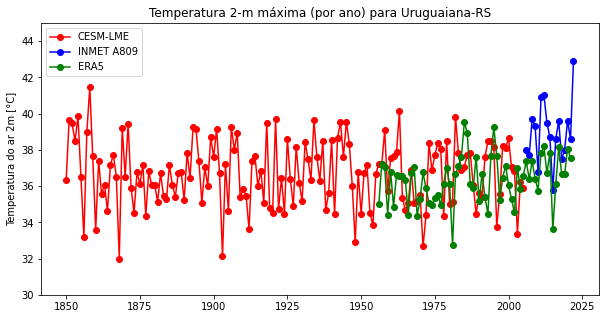

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,5))

ax.plot(df_cesm,'-or',label='CESM-LME')
ax.plot(df_inmet,'-ob',label='INMET A809')
ax.plot(df_era5,'-og',label='ERA5')

ax.set_ylabel('Temperatura do ar 2m [°C]')
ax.set_ylim([30,45])
plt.legend()
ax.set_title('Temperatura 2-m máxima (por ano) para Uruguaiana-RS')

plt.show()

## Combinando as séries

Como o interesse aqui é a variabilidade ao lngo do tempo, combinamos todas as séries em uma só para poder calcular uma média (mediana) móvel de 10 anos. 

In [ ]:
# Combinando todas as séries

df_combo = pd.concat([df_cesm,df_era5,df_inmet],axis=0).sort_index()
df_combo = df_combo.groupby(df_combo.index).median()
df_combo.index = pd.to_datetime(df_combo.index, format='%Y')

# e tirando a média pelo ano
df_mean = df_combo.rolling(window=10,min_periods=1).mean()

...e por último um gráfico mais "apresentável"

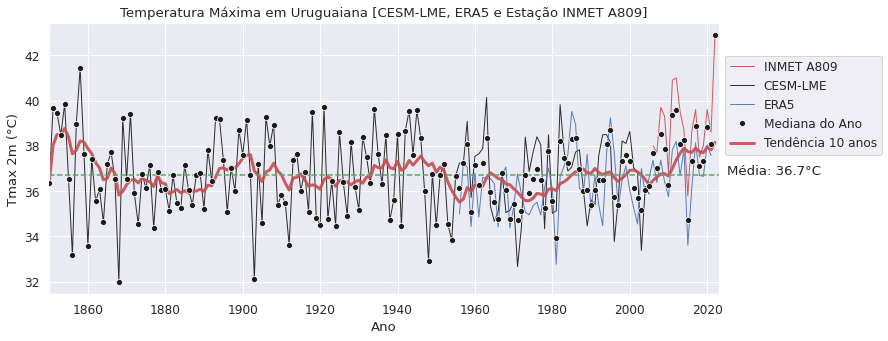

In [ ]:
import datetime

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))
sns.set(font_scale=1.1)


ax = sns.lineplot(x=pd.to_datetime(df_inmet.index, format='%Y'), y=df_inmet['Tmax'],color='r',linewidth=1,alpha=0.9,label='INMET A809')
ax = sns.lineplot(x=pd.to_datetime(df_cesm.index, format='%Y'), y=df_cesm['Tmax'],color='k',linewidth=1,alpha=0.9,label='CESM-LME')
ax = sns.lineplot(x=pd.to_datetime(df_era5.index, format='%Y'), y=df_era5['Tmax'],color='b',linewidth=1,alpha=0.9,label='ERA5')

ax = sns.lineplot(x=df_combo.index, y=df_combo['Tmax'],marker='o',color='k',linewidth=0,zorder=10,label='Mediana do Ano')
ax = sns.lineplot(x=df_mean.index, y=df_mean['Tmax'],color='r',alpha=0.9,linewidth=3,label='Tendência 10 anos')

ax.axhline(y=df_mean.mean().values,linestyle='--',color='g')
ax.set(title='Temperatura Máxima em Uruguaiana [CESM-LME, ERA5 e Estação INMET A809]')
ax.set(xlabel='Ano')
ax.set(ylabel='Tmax 2m (°C)')
ax.set_xlim([datetime.datetime(1850,1,1),datetime.datetime(2023,1,1)])

ax.text(datetime.datetime(2025,1,1),df_mean.mean().values,f'Média: {float(df_mean.mean().values):.1f}°C')

plt.legend(bbox_to_anchor=[1, 0.9])
plt.show()

Este foi um exercício muito interessante e que mostra o qual importante é a análise de dados. Se você tem comentários, ideias ou quer contribuir para este notebook, basta deixar um comentário no github.

